## Mount Drive

In [141]:
# from google.colab import drive
# drive.mount("/content/drive")

## Importing Packages

In [142]:
# Fetching Dataset
import pandas as pd

# Reading Image
import os
import cv2 as cv
import matplotlib.pyplot as plt

# Scaling Features
from sklearn.preprocessing import MinMaxScaler

# Binarizing Output
from sklearn.preprocessing import LabelBinarizer

# Spliting Train & Test Set
from sklearn.model_selection import train_test_split

# Image Augmentation
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Creating and Training Model
from tensorflow.keras import layers, models
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.applications import ResNet50, ResNet152

# Evaluating Model
from sklearn.metrics import (classification_report, multilabel_confusion_matrix, confusion_matrix)
import seaborn as sb
import matplotlib.pyplot as plt

# Making Predictions
import numpy as np

## Fetching Dataset

In [143]:
dataset_train = pd.DataFrame(columns = ['Filename', 'Class'])
dataset_test = pd.DataFrame(columns = ['Filename', 'Class'])

In [144]:
dataset_train

,Filename,Class


In [145]:
dataset_test

,Filename,Class


In [146]:
dataset_dir = '/kaggle/input/cifar10/cifar10/'
# dataset_dir = '/Datasets/cifar10/'
train_dataset_dir = dataset_dir + 'train/'
test_dataset_dir = dataset_dir + 'test/'
class_names = os.listdir(train_dataset_dir)
class_names

['airplane',
 'horse',
 'truck',
 'automobile',
 'ship',
 'dog',
 'bird',
 'frog',
 'cat',
 'deer']

In [147]:
for i, class_name in enumerate(class_names):
  # filenames = train_dataset_dir + dis
  file_dir = os.path.join(train_dataset_dir, class_name)
  file_list = os.listdir(file_dir)
  for j, filename in enumerate(file_list):
    # print(dis)
    dataset_train.loc[len(dataset_train.index)] = [filename, class_name]
  print("Files and directories in '", file_dir, "' :", j+1)

Files and directories in ' /kaggle/input/cifar10/cifar10/train/airplane ' : 5000
Files and directories in ' /kaggle/input/cifar10/cifar10/train/horse ' : 5000
Files and directories in ' /kaggle/input/cifar10/cifar10/train/truck ' : 5000
Files and directories in ' /kaggle/input/cifar10/cifar10/train/automobile ' : 5000
Files and directories in ' /kaggle/input/cifar10/cifar10/train/ship ' : 5000
Files and directories in ' /kaggle/input/cifar10/cifar10/train/dog ' : 5000
Files and directories in ' /kaggle/input/cifar10/cifar10/train/bird ' : 5000
Files and directories in ' /kaggle/input/cifar10/cifar10/train/frog ' : 5000
Files and directories in ' /kaggle/input/cifar10/cifar10/train/cat ' : 5000
Files and directories in ' /kaggle/input/cifar10/cifar10/train/deer ' : 5000


In [148]:
for i, class_name in enumerate(class_names):
  # filenames = test_dataset_dir + dis
  file_dir = os.path.join(test_dataset_dir, class_name)
  file_list = os.listdir(file_dir)
  for j, filename in enumerate(file_list):
    # print(dis)
    dataset_test.loc[len(dataset_test.index)] = [filename, class_name]
  print("Files and directories in '", file_dir, "' :", j+1)

Files and directories in ' /kaggle/input/cifar10/cifar10/test/airplane ' : 1000
Files and directories in ' /kaggle/input/cifar10/cifar10/test/horse ' : 1000
Files and directories in ' /kaggle/input/cifar10/cifar10/test/truck ' : 1000
Files and directories in ' /kaggle/input/cifar10/cifar10/test/automobile ' : 1000
Files and directories in ' /kaggle/input/cifar10/cifar10/test/ship ' : 1000
Files and directories in ' /kaggle/input/cifar10/cifar10/test/dog ' : 1000
Files and directories in ' /kaggle/input/cifar10/cifar10/test/bird ' : 1000
Files and directories in ' /kaggle/input/cifar10/cifar10/test/frog ' : 1000
Files and directories in ' /kaggle/input/cifar10/cifar10/test/cat ' : 1000
Files and directories in ' /kaggle/input/cifar10/cifar10/test/deer ' : 1000


In [149]:
dataset_train

,Filename,Class
0,0566.png,airplane
1,4353.png,airplane
2,2664.png,airplane
3,0115.png,airplane
4,2539.png,airplane
...,...,...
49995,2392.png,deer
49996,3926.png,deer
49997,4225.png,deer
49998,2995.png,deer


In [150]:
dataset_test

,Filename,Class
0,0566.png,airplane
1,0115.png,airplane
2,0050.png,airplane
3,0501.png,airplane
4,0263.png,airplane
...,...,...
9995,0931.png,deer
9996,0222.png,deer
9997,0672.png,deer
9998,0544.png,deer


In [151]:
X_train = dataset_train.loc[:, 'Filename'].values
X_test = dataset_test.loc[:, 'Filename'].values
y_train = dataset_train.loc[:, 'Class'].values
y_test = dataset_test.loc[:, 'Class'].values

In [152]:
X_train

array(['0566.png', '4353.png', '2664.png', ..., '4225.png', '2995.png',
       '4164.png'], dtype=object)

In [153]:
X_test

array(['0566.png', '0115.png', '0050.png', ..., '0672.png', '0544.png',
       '0575.png'], dtype=object)

In [154]:
y_train

array(['airplane', 'airplane', 'airplane', ..., 'deer', 'deer', 'deer'],
      dtype=object)

In [155]:
y_test

array(['airplane', 'airplane', 'airplane', ..., 'deer', 'deer', 'deer'],
      dtype=object)

In [156]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(50000,)
(10000,)
(50000,)
(10000,)


## Reading & Preprocessing Image

In [157]:
IMG_SIZE = 32 # Same Height and Width is being used
x_train_data = np.empty((len(X_train), IMG_SIZE, IMG_SIZE, 3), dtype = np.int64)
x_test_data = np.empty((len(X_test), IMG_SIZE, IMG_SIZE, 3), dtype = np.int64)

In [158]:
print(x_train_data.shape)
print(x_test_data.shape)

(50000, 32, 32, 3)
(10000, 32, 32, 3)


In [159]:
for i, img_path in enumerate(X_train):
    img = cv.imread(train_dataset_dir + y_train[i] + "/" + img_path)
    img_rs = cv.resize(img, dsize = (IMG_SIZE, IMG_SIZE))
    # img_gray = cv.cvtColor(img_rs, cv.COLOR_BGR2GRAY)
    # ret, candidate_threshold = cv.threshold(img_gray, 0, 255, cv.THRESH_BINARY_INV + cv.THRESH_OTSU)
    x_train_data[i] = img_rs

In [160]:
for i, img_path in enumerate(X_test):
    img = cv.imread(test_dataset_dir + y_test[i] + "/" + img_path)
    img_rs = cv.resize(img, dsize = (IMG_SIZE, IMG_SIZE))
    # img_gray = cv.cvtColor(img_rs, cv.COLOR_BGR2GRAY)
    # ret, candidate_threshold = cv.threshold(img_gray, 0, 255, cv.THRESH_BINARY_INV + cv.THRESH_OTSU)
    x_test_data[i] = img_rs

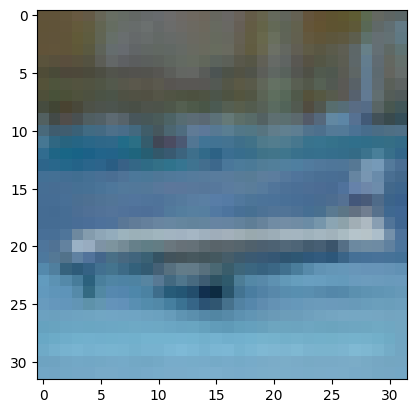

In [161]:
plt.imshow(x_train_data[1])

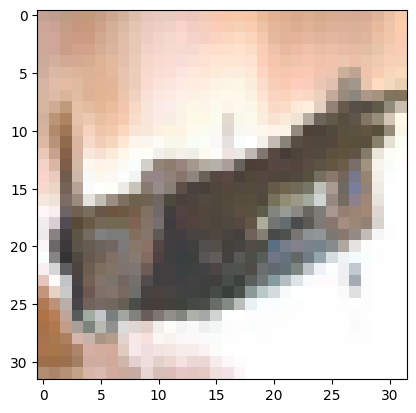

In [162]:
plt.imshow(x_test_data[1])

In [163]:
len(x_train_data[0][0])

32

In [164]:
len(x_test_data[0][0])

32

In [165]:
X_train = np.reshape(x_train_data, (X_train.shape[0], IMG_SIZE * IMG_SIZE, 3))
X_test = np.reshape(x_test_data, (X_test.shape[0], IMG_SIZE * IMG_SIZE, 3))

In [166]:
print(X_train.shape)
print(X_test.shape)

(50000, 1024, 3)
(10000, 1024, 3)


## Scaling Features

In [167]:
# sc = MinMaxScaler()
# X_train = sc.fit_transform(X_train)
# X_test = sc.transform(X_test)

In [168]:
X_train

array([[[182, 139,  96],
        [182, 138,  99],
        [181, 138, 103],
        ...,
        [176, 128,  86],
        [174, 126,  84],
        [174, 126,  84]],

       [[ 96,  83,  57],
        [ 96,  83,  57],
        [ 98,  85,  59],
        ...,
        [118, 168, 196],
        [118, 167, 196],
        [116, 167, 197]],

       [[180, 169, 155],
        [180, 173, 158],
        [184, 178, 164],
        ...,
        [208, 209, 205],
        [208, 209, 206],
        [209, 211, 209]],

       ...,

       [[ 17,  34,  45],
        [ 53,  81,  88],
        [ 65,  96, 111],
        ...,
        [ 69, 133, 156],
        [ 75, 139, 162],
        [ 77, 141, 164]],

       [[ 27,  10,   7],
        [ 29,  11,   8],
        [ 28,  11,   8],
        ...,
        [113, 134, 127],
        [105, 126, 120],
        [ 95, 115, 111]],

       [[158, 201, 205],
        [132, 165, 173],
        [124, 156, 167],
        ...,
        [112, 150, 151],
        [111, 149, 149],
        [117, 155, 156]]

In [169]:
X_test

array([[[240, 218, 187],
        [236, 211, 181],
        [237, 208, 179],
        ...,
        [212, 172, 144],
        [212, 171, 146],
        [211, 169, 147]],

       [[195, 161, 149],
        [192, 159, 144],
        [189, 155, 132],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[235, 201, 181],
        [232, 199, 189],
        [234, 202, 192],
        ...,
        [ 66, 128, 117],
        [ 70, 131, 120],
        [ 73, 132, 120]],

       ...,

       [[  8,  13,  11],
        [ 11,  18,  15],
        [  3,   4,   3],
        ...,
        [128, 159, 170],
        [122, 149, 161],
        [131, 153, 166]],

       [[189, 170, 167],
        [194, 179, 176],
        [210, 195, 191],
        ...,
        [ 74, 127, 163],
        [ 75, 126, 156],
        [ 79, 126, 156]],

       [[ 40,  69,  68],
        [ 36,  70,  66],
        [ 38,  76,  70],
        ...,
        [ 46,  94, 105],
        [ 59,  94, 107],
        [ 49,  80,  88]]

## Binarizing Output

In [170]:
lb = LabelBinarizer()
y_train = lb.fit_transform(y_train)
y_test = lb.transform(y_test)

In [171]:
y_train

array([[1, 0, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [172]:
y_test

array([[1, 0, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [173]:
print(y_train.shape)
print(y_test.shape)

(50000, 10)
(10000, 10)


## Spliting Train & Test Set


In [174]:
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, train_size = 0.9, random_state = 45, stratify = y_train)

In [175]:
print(X_train.shape, X_val.shape, y_train.shape, y_val.shape)

(45000, 1024, 3) (5000, 1024, 3) (45000, 10) (5000, 10)


In [176]:
X_train = X_train.reshape(-1, IMG_SIZE, IMG_SIZE, 3)
X_val = X_val.reshape(-1, IMG_SIZE, IMG_SIZE, 3)
X_test = X_test.reshape(-1, IMG_SIZE, IMG_SIZE, 3)

In [177]:
print(X_train.shape)
print(X_val.shape)
print(X_test.shape)

(45000, 32, 32, 3)
(5000, 32, 32, 3)
(10000, 32, 32, 3)


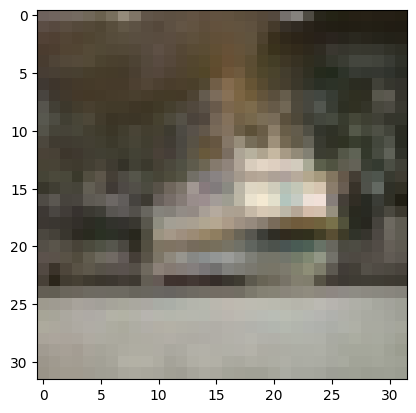

In [178]:
plt.imshow(X_train[45])

## Image Augmentation

In [179]:
# # Define ImageDataGenerator
# datagen = ImageDataGenerator(
#     rotation_range = 10,
#     zoom_range = 0.1,
#     shear_range = 0.5,
#     cval = 0.0,
#     fill_mode = 'constant')

In [180]:
# # Generate augmented data
# batch_size = 32
# train_generator = datagen.flow(X_train, y_train, batch_size = batch_size, shuffle = False)

In [181]:
# len(train_generator)

## Creating and Training a CNN Model


In [182]:
# model = models.Sequential()
# model.add(layers.Input((IMG_SIZE, IMG_SIZE, 3)))
# # model.add(layers.Conv2D(filters = 28, kernel_size = (3, 3), activation = 'relu', input_shape = (IMG_SIZE, IMG_SIZE, 3)))
# model.add(layers.Conv2D(filters = 28, kernel_size = (3, 3), activation = 'relu'))
# model.add(layers.MaxPooling2D((2, 2)))
# model.add(layers.Conv2D(filters = 56, kernel_size = (3, 3), activation = 'relu'))
# model.add(layers.MaxPooling2D((2, 2)))
# model.add(layers.Conv2D(filters = 56, kernel_size = (3, 3), activation = 'relu'))
# model.add(layers.Flatten())
# model.add(layers.Dense(units = 56, activation = 'relu'))
# model.add(layers.Dense(units = 10, activation = 'softmax'))

[Keras Available models](https://keras.io/api/applications/)

In [183]:
# Load the pre-trained model
resnet50 = ResNet50(weights='imagenet', input_shape=(IMG_SIZE*5, IMG_SIZE*5, 3), include_top=False)

# Freeze the weights of the pre-trained layers
for layer in resnet50.layers:
    layer.trainable = False

# Add your custom layers to the top of the pre-trained model
model = models.Sequential(name = 'CIFAR-10-Object-Recognition')
model.add(layers.Input((IMG_SIZE, IMG_SIZE, 3)))
model.add(layers.UpSampling2D(size=(5, 5)))
model.add(resnet50)
model.add(layers.Flatten())
model.add(layers.Dense(units=1024, activation='relu'))
model.add(layers.Dense(units=512, activation='relu'))
model.add(layers.Dense(units=10, activation='softmax'))

In [184]:
model.summary()

Model: "CIFAR-10-Object-Recognition"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ up_sampling2d_2 (UpSampling2D)  │ (None, 160, 160, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ resnet50 (Functional)           │ (None, 5, 5, 2048)     │    23,587,712 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_3 (Flatten)             │ (None, 51200)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 1024)           │    52,429,824 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 512)            │       524,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 10)             │         5,130 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 76,547,466 (292.01 MB)

 Trainable params: 52,959,754 (202.03 MB)

 Non-trainable params: 23,587,712 (89.98 MB)

In [185]:
epochs = 100
acc_callback = EarlyStopping(monitor = 'val_accuracy', verbose = 1, patience = 10, mode = 'max', restore_best_weights = True, start_from_epoch = 15)
# loss_callback = EarlyStopping(monitor = 'val_loss', verbose = 1, patience = 10, mode = 'min', restore_best_weights = True, start_from_epoch = 15)

In [186]:
model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [187]:
# history  = model.fit(train_generator, validation_data = (X_val, y_val), epochs = epochs, callbacks = [acc_callback, loss_callback])
history  = model.fit(X_train, y_train, validation_data = (X_val, y_val), epochs = epochs, callbacks = acc_callback)

Epoch 1/100
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 112s 71ms/step - accuracy: 0.6682 - loss: 2.5801 - val_accuracy: 0.7784 - val_loss: 0.6310
Epoch 2/100
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 92s 66ms/step - accuracy: 0.8464 - loss: 0.4517 - val_accuracy: 0.8022 - val_loss: 0.6179
Epoch 3/100
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 93s 66ms/step - accuracy: 0.8967 - loss: 0.2932 - val_accuracy: 0.8124 - val_loss: 0.5752
Epoch 4/100
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 93s 66ms/step - accuracy: 0.9305 - loss: 0.2033 - val_accuracy: 0.8204 - val_loss: 0.6307
Epoch 5/100
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 92s 66ms/step - accuracy: 0.9452 - loss: 0.1598 - val_accuracy: 0.8130 - val_loss: 0.7542
Epoch 6/100
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 92s 65ms/step - accuracy: 0.9581 - loss: 0.1253 - val_accuracy: 0.8246 - val_loss: 0.7720
Epoch 7/100
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 92s 65ms/step - accuracy: 0.9658 - loss: 0.1012 - val_accuracy: 0.8224 - val_loss: 0.7736
Epoch 8/100
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 92s 65ms/step - accuracy:

## Evaluating the CNN model


In [188]:
history_test = model.evaluate(X_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 18s 56ms/step - accuracy: 0.8530 - loss: 1.1093


In [189]:
y_predicted = model.predict(X_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 25s 64ms/step


In [190]:
y_predicted

array([[9.9776852e-01, 3.6331043e-09, 2.2312121e-03, ..., 7.9942009e-10,
        2.2432762e-07, 6.9548980e-09],
       [1.2053523e-01, 9.4285868e-05, 6.0440489e-06, ..., 3.7499819e-07,
        8.7929964e-01, 6.1034407e-05],
       [2.4722426e-03, 1.4418367e-02, 9.9636726e-09, ..., 1.2701307e-09,
        2.7612083e-05, 9.8308176e-01],
       ...,
       [1.7602750e-07, 1.7045313e-09, 4.8436427e-06, ..., 6.4526039e-06,
        1.0861679e-06, 1.6083995e-10],
       [3.1543389e-11, 9.0000506e-17, 1.2998801e-07, ..., 4.1497779e-09,
        3.1191436e-10, 1.1950307e-17],
       [2.0080217e-09, 3.6012648e-09, 1.1725139e-05, ..., 1.6617875e-08,
        3.9033728e-11, 7.7119616e-10]], dtype=float32)

In [191]:
y_test_labels = lb.inverse_transform(y_test)
y_predicted_labels = lb.inverse_transform(y_predicted)

In [192]:
print("Classification Report:")
clr = classification_report(y_test_labels, y_predicted_labels)
print(clr)

Classification Report:
              precision    recall  f1-score   support

    airplane       0.88      0.82      0.85      1000
  automobile       0.87      0.92      0.90      1000
        bird       0.72      0.82      0.77      1000
         cat       0.72      0.66      0.69      1000
        deer       0.82      0.74      0.78      1000
         dog       0.79      0.74      0.76      1000
        frog       0.85      0.88      0.87      1000
       horse       0.80      0.89      0.85      1000
        ship       0.90      0.92      0.91      1000
       truck       0.91      0.87      0.89      1000

    accuracy                           0.83     10000
   macro avg       0.83      0.83      0.83     10000
weighted avg       0.83      0.83      0.83     10000



In [193]:
print("Confusion Matrix:")
multilabel_cm = multilabel_confusion_matrix(y_test_labels, y_predicted_labels)
cm = confusion_matrix(y_test_labels, y_predicted_labels)
print(cm)

Confusion Matrix:
[[821  21  44  10  13   6   5  14  53  13]
 [ 12 920   3   6   1   1   3   6  12  36]
 [ 29   2 822  30  36  16  39  19   4   3]
 [ 13   7  59 657  36 116  50  52   6   4]
 [  5   2  85  31 741  24  35  64   9   4]
 [  4   1  37 118  30 740  13  49   5   3]
 [  2   1  55  37  10  12 879   2   1   1]
 [ 10   0  25  19  26  20   2 894   0   4]
 [ 27  16   3   4   5   1   3   3 916  22]
 [ 14  82   3   6   1   0   2   9  13 870]]


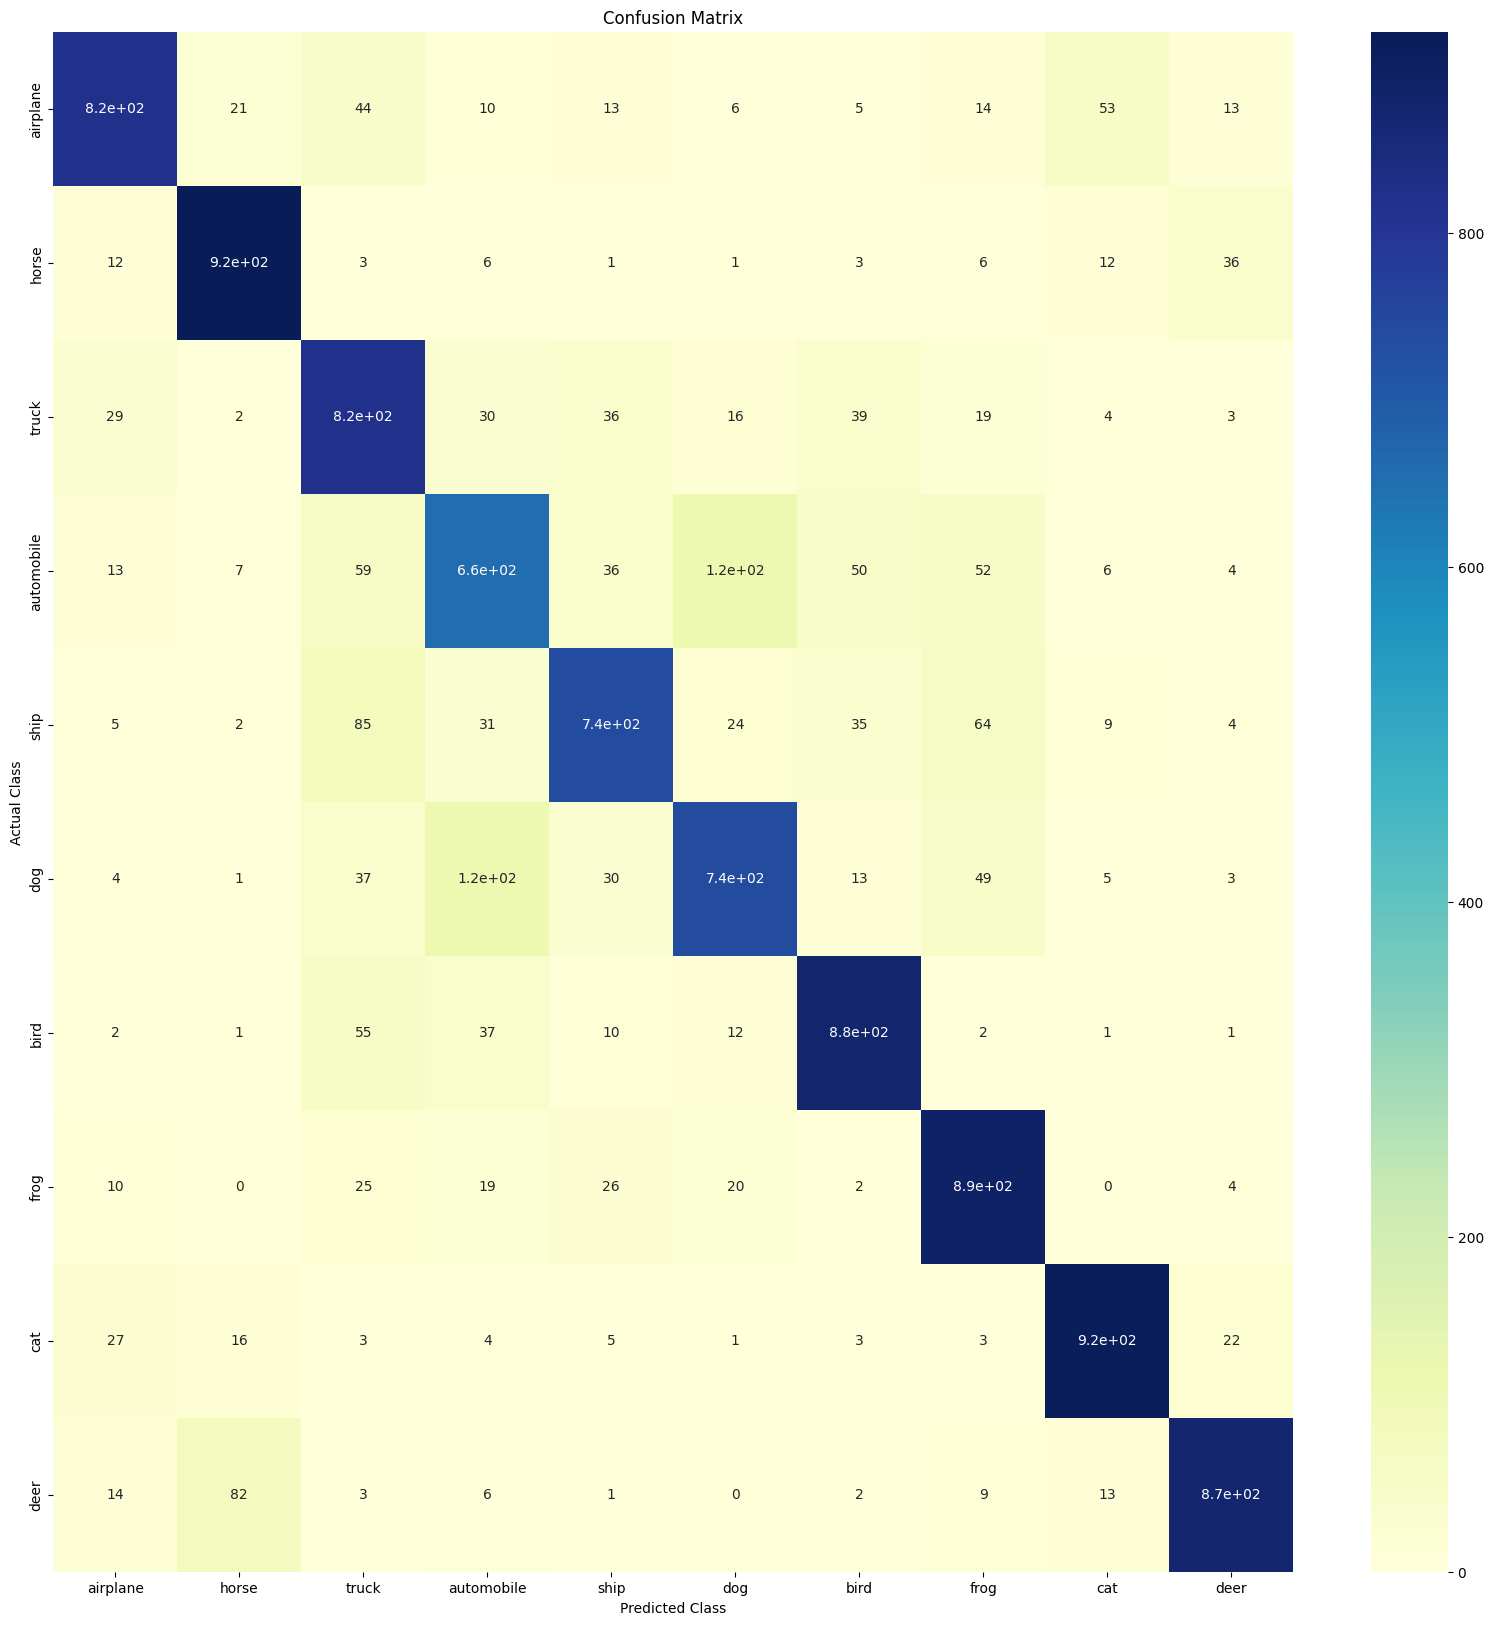

In [194]:
cm_df = pd.DataFrame(cm, index = dataset_train.Class.unique(), columns = dataset_train.Class.unique())
plt.figure(figsize=(20, 20))
cm_plot = sb.heatmap(cm_df, cmap="YlGnBu", annot=True)
plt.title('Confusion Matrix')
plt.ylabel('Actual Class')
plt.xlabel('Predicted Class')
plt.show(cm_plot)

## Making Predictions


In [195]:
# y_predicted_by_model = model.predict(X_test)

In [196]:
# print(y_predicted_by_model[0])
# # print("\n")
# print(np.argmax(y_predicted_by_model[0]))

In [197]:
# for i in range(5):
#   print(np.argmax(y_predicted_by_model[i]), end = ' ')

In [198]:
# y_predicted_labels = [np.argmax(i) for i in y_predicted_by_model]
# y_predicted_labels[:5]

In [199]:
# y_test
# # y_train

[Kaggle Notebook](https://www.kaggle.com/code/avishekchy1578/cifar-10-cnn-object-recognition)